In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt


In [68]:
df=pd.read_csv("dataJobs.csv")
df=df.dropna()
df

,company,job-title,job-description,level
0,AppZen,Data Scientist,It ProfessionalsGrowing AI dvlpmt co seeks Dat...,Entry level
1,Patterned Learning AI,Data Scientist,"REMOTE (US/Canada Residing people only, with w...",Entry level
2,Patterned Learning AI,Data Scientist,"REMOTE (US/Canada Residing people only, with w...",Entry level
3,SynergisticIT,Data Scientist,SYNERGISTICIT wants every candidate to know th...,Entry level
4,Perfect Snacks,Data Scientist,Company DescriptionWho We Are...Based in sunny...,Mid-Senior level
...,...,...,...,...
1370,Tutor Intelligence,Machine Learning Engineer,We encourage people of all backgrounds and ide...,Not Applicable
1371,Diverse Lynx,Machine Learning Engineer,Job DescriptionJob Role : Software Engineer (P...,Entry level
1372,SynergisticIT,Machine Learning Engineer,SYNERGISTICIT wants every candidate to know th...,Entry level
1373,SynergisticIT,Machine Learning Engineer,SYNERGISTICIT wants every candidate to know th...,Entry level


In [80]:
job_descriptions = df["job-description"].tolist()
job_titles = df["job-title"].tolist()


In [85]:
import re
import nltk
import string
from transformers import BertTokenizer

#nltk.download('punkt')
#nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

def clean_message(message):
    message = message.lower()
    message = re.sub(r"http\S+", "", message)
    message = re.sub(r"www.\S+", "", message)
    message = bert_tokenizer.tokenize(message)
    message_links_removed = "".join([char for char in message if char not in string.punctuation])
    message_cleaned = " ".join([word for word in re.split('\W+', message_links_removed)
        if word not in stopword])
    message = " ".join([wn.lemmatize(word) for word in re.split('\W+', message_cleaned)])
    return message


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aswat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aswat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\aswat\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [74]:
job_descriptions=[clean_message(x) for x in job_descriptions]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(job_descriptions, job_titles, test_size=0.2, random_state=42)
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test=cv.transform(X_test)


In [82]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

Accuracy: 0.8297872340425532


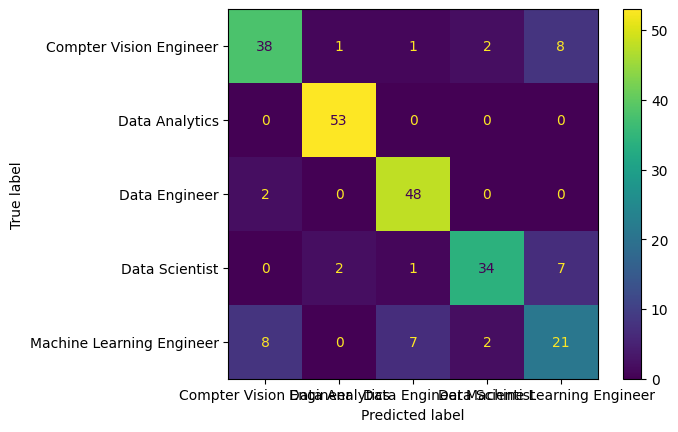

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Compter Vision Engineer","Data Analytics","Data Engineer","Data Scientist","Machine Learning Engineer"])
disp.plot()
plt.show()

In [26]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)

Accuracy: 0.8553191489361702


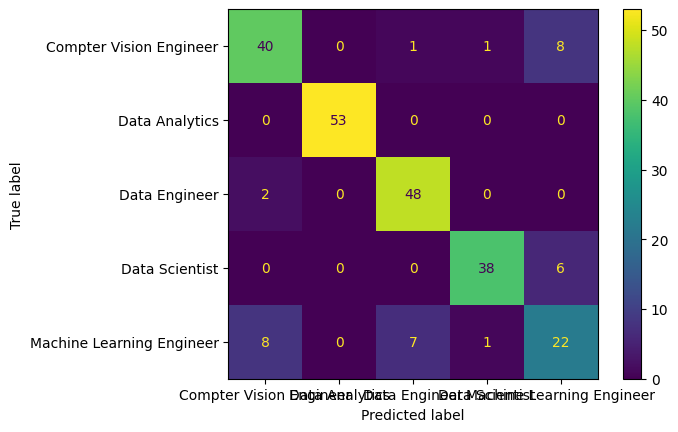

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_gb, labels=gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Compter Vision Engineer","Data Analytics","Data Engineer","Data Scientist","Machine Learning Engineer"])
disp.plot()
plt.show()

In [84]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.8680851063829788


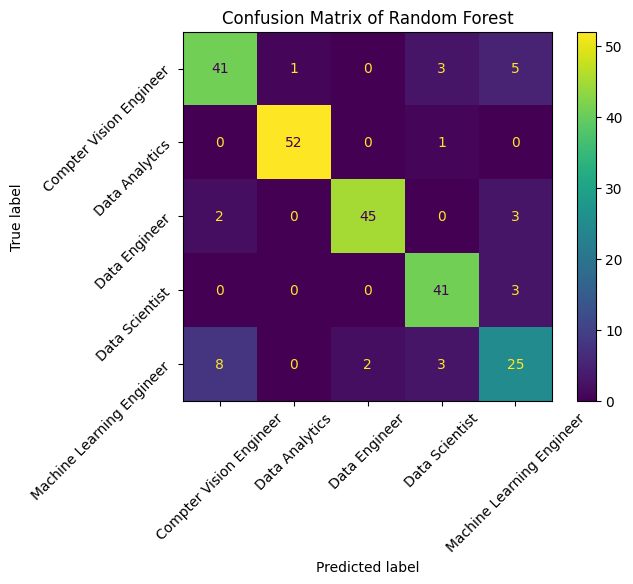

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Compter Vision Engineer","Data Analytics","Data Engineer","Data Scientist","Machine Learning Engineer"])
disp.plot()
plt.title("Confusion Matrix of Random Forest")
plt.xticks(rotation=45)

# Rotate y-axis labels by 45 degrees
plt.yticks(rotation=45)
plt.show()


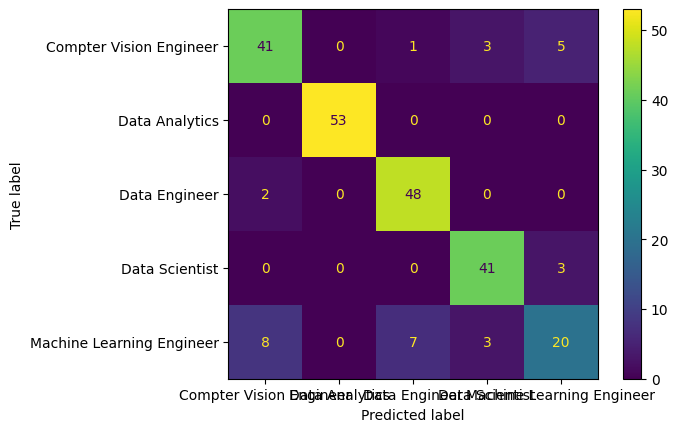

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Compter Vision Engineer","Data Analytics","Data Engineer","Data Scientist","Machine Learning Engineer"])
disp.plot()
plt.show()

In [92]:
svm = LinearSVC(max_iter=2000)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)
from sklearn.metrics import jaccard_score
jaccard_similarity = jaccard_score(y_pred_svm, y_test,average='macro')

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8382978723404255
Jaccard Index: 0.7231739891314359


c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


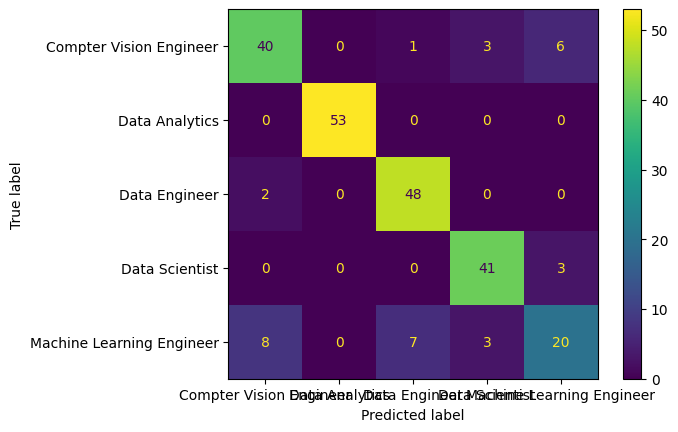

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_svm, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Compter Vision Engineer","Data Analytics","Data Engineer","Data Scientist","Machine Learning Engineer"])
disp.plot()

plt.show()

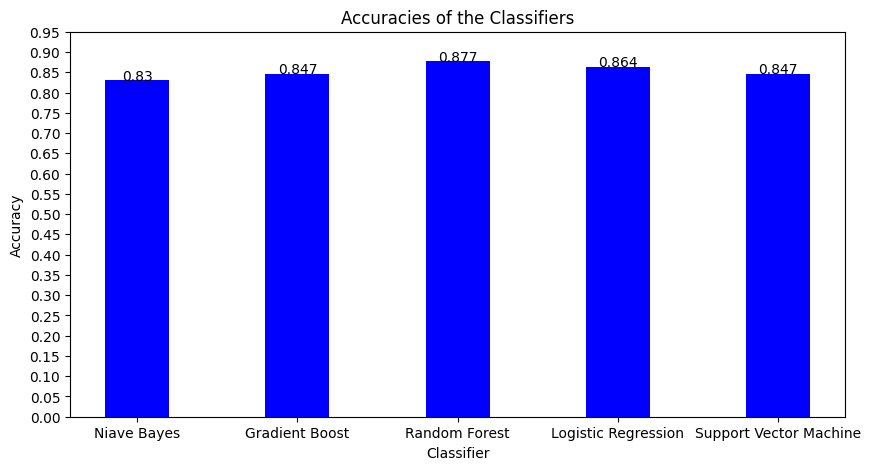

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (10, 5))
x=["Niave Bayes","Gradient Boost","Random Forest","Logistic Regression","Support Vector Machine"]
y=[accuracy_nb,accuracy_gb,accuracy_rf,accuracy_lr,accuracy_svm]
# creating the bar plot
plt.bar(x, y, color ='blue',
        width = 0.4)
plt.yticks(np.arange(0, 1, step=0.05))
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracies of the Classifiers")
for i in range(len(x)):
     plt.text(i, y[i], round(y[i],3), ha = 'center')
plt.show()

In [88]:
job_descriptions

["It ProfessionalsGrowing AI dvlpmt co seeks Data Scientists (NLP) [50] w/ base pay $130,450-$170K/yr. Deg'd/exp'd In-house FT great compens/benefitsSend resume to AppZen, San Jose, CA 50@AppZen.com\n      \n\n        Show more\n\n        \n\n\n        Show less",
 'REMOTE (US/Canada Residing people only, with work permit)Patterned Learning – Data Scientist (Entry Level ) , FULL-TIME, Salary $100K - $130K a year.About us: The Future of AI is Patterned, a stealth-mode technology startup. Top investors include Sequoia and Anderson Horowitz, founders from Google, DeepMind, and NASA and we’re hiring for almost everything!About The Job RequirementsM.S. or PhD in Data Science/Electrical Engineering/Computer ScienceExperience in machine learning, data science or similar rolesExperience with version control systems, collaborative coding frameworks and scalable engineering tools such as DockerSolid understanding of the theory and practice of machine learning algorithmsExperience building functi

In [90]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from statistics import mean
similarity={}
resume_text= "PROFESSIONAL EXPERIENCE Universiti Teknologi PETRONAS, Perak, Malaysia June 2021 - March 2022 Research Intern (Data Science) - Python, Pandas, NumPy, Scikit-learn, TensorFlow, TF-Lite, Keras, RPi. • Designed a novel Artificial Neural Network (ANN) architecture to fabricate a Motor Bearing Non-Invasive Fault Testing Rig (MOBIT) which improves plant efficiency by 25% and decreases replacement costs by over 35%.• Fabricated a computationally light image classification algorithm to analyze Park Vector images of IM motors.• Researched with real-world induction motor data provided by Petronas, to implement predictive maintenance in industrial plants. Achieved 98.7% accuracy in fault prediction and deployed predictive model in RPi. Biosthra, Chennai, India March 2021 - December 2021 IoT Engineer and Data Analyst - Flutter, Python, Pandas, NumPy TensorFlow, Keras, Time Series, DoE.• Architected the IoT system of an automated compost pit to monitor key parameters such as pH values and temperature.• Enabled visualization of all key metrics in a live mobile dashboard using ThingSpeak. Further, built the framework tocontrol working of the compost pit via a custom flutter application, thus reducing compost time by 33%.• Developed a machine learning algorithm to predict heat produced by the compost pit at different time stamps, compostconsistencies and reduce its reliance on sensors which are bound to fail in hostile conditions.Saint Louis University, St. Louis, Missouri (Virtual) October 2021 - November 2021 Data Analyst intern - Tableau, R (Rshiny), MS Office suite.• Analyzed real-world data from client industry Ad-campaigns to decide upon the best performers.• Took charge as intern project lead and orchestrated working of the team in visualization of important metrics.• Undertook responsibility to present conclusions and visualizations from the trained model."
jobs=["CVE","DA","DE","DS","MLE"]
for job in jobs:
  df=pd.read_csv('linkedinjobs'+job+'.csv')
  df=df.dropna()
  sim=[]
  for x in df["job-description"].tolist():
    job_description =x
    data = pd.DataFrame({'text': [resume_text, job_description]})
    vectorizer = CountVectorizer().fit_transform(data['text'])
    cos_sim = cosine_similarity(vectorizer[0], vectorizer[1])[0][0]
    sim.append(cos_sim)
    print("The cosine similarity score between the resume and job description is:", cos_sim)
  similarity[job]=mean(sim)


The cosine similarity score between the resume and job description is: 0.39858739994341824
The cosine similarity score between the resume and job description is: 0.42202512485434424
The cosine similarity score between the resume and job description is: 0.5003790978018228
The cosine similarity score between the resume and job description is: 0.4705807125986845
The cosine similarity score between the resume and job description is: 0.463019727476313
The cosine similarity score between the resume and job description is: 0.4398054376891351
The cosine similarity score between the resume and job description is: 0.45223376886555644
The cosine similarity score between the resume and job description is: 0.4698388262507255
The cosine similarity score between the resume and job description is: 0.35834468731623315
The cosine similarity score between the resume and job description is: 0.13655289896181635
The cosine similarity score between the resume and job description is: 0.4154786799185604
The co

In [ ]:
similarity

{'CVE': 0.466225762491494,
 'DA': 0.4799135645044779,
 'DE': 0.47239386795199606,
 'DS': 0.46118747809029575,
 'MLE': 0.43631016998630634}

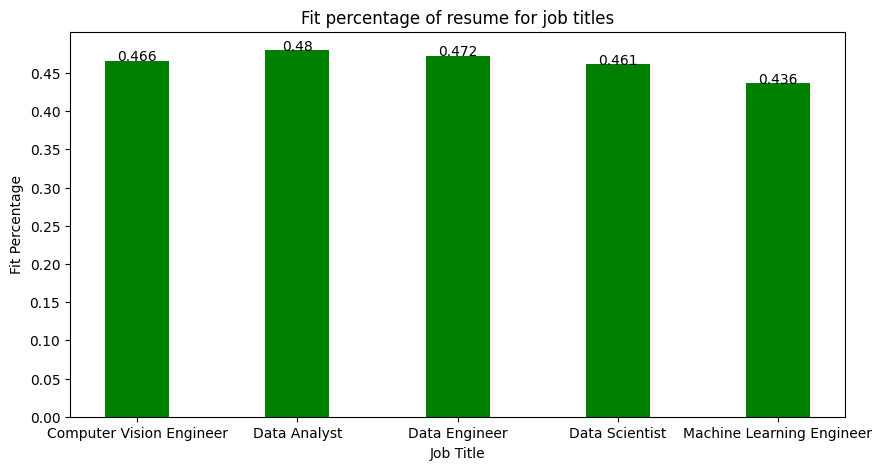

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (10, 5))
x=["Computer Vision Engineer","Data Analyst","Data Engineer","Data Scientist","Machine Learning Engineer"]
y=list(similarity.values())
# creating the bar plot
plt.bar(x, y, color ='green',
        width = 0.4)
plt.yticks(np.arange(0, 0.5, step=0.05))
plt.xlabel("Job Title")
plt.ylabel("Fit Percentage")
plt.title("Fit percentage of resume for job titles")
for i in range(len(x)):
     plt.text(i, y[i], round(y[i],3), ha = 'center')
plt.show()